In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import pickle as pkl
import xml.etree.ElementTree as ET
import os
import sklearn
import mne
import tensorflow as tf
import pymc as pm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import tensorflow_probability as tfp


from collections import defaultdict
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Dropout, GlobalAveragePooling2D, Flatten, Dense, InputLayer, SeparableConv2D
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from scipy.stats import ttest_rel, f_oneway
from statsmodels.formula.api import ols
from statsmodels.regression.mixed_linear_model import MixedLM
from statsmodels.formula.api import mixedlm


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [29]:
path = "D:/Maynooth Coursework/Final_Project/Simanova_Data/" #Replace with your path to the Data folder

#### Renaming all the files into their right file format
(Already done for the data that has been provided)

In [29]:
for i in range(6, 28):
    try:
        # rename all files ending in .eeg.seg to .eeg
        #Replace with your file path (file path that goes like' /Simanova_Data/Unformated/RawData_EEG/subj{i:02}.eeg....')
        os.rename(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.eeg.seg",  
                f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.eeg");
    except:
        print("The file doesnt exist or renamed already:", f"subj{i:02}.eeg.seg", "to",f"subj{i:02}.eeg" );

    try:
        # rename all files ending in vmrk.vmrk to .vmrk
        os.rename(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vmrk.vmkr", 
                f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vmrk");
    except:
        print("The file doesnt exist or renamed already:", f"subj{i:02}.vmrk.vmkr", "to",f"subj{i:02}.vmrk" );


The file doesnt exist or renamed already: subj06.eeg.seg to subj06.eeg
The file doesnt exist or renamed already: subj06.vmrk.vmkr to subj06.vmrk
The file doesnt exist or renamed already: subj07.eeg.seg to subj07.eeg
The file doesnt exist or renamed already: subj07.vmrk.vmkr to subj07.vmrk
The file doesnt exist or renamed already: subj08.eeg.seg to subj08.eeg
The file doesnt exist or renamed already: subj08.vmrk.vmkr to subj08.vmrk
The file doesnt exist or renamed already: subj09.eeg.seg to subj09.eeg
The file doesnt exist or renamed already: subj09.vmrk.vmkr to subj09.vmrk
The file doesnt exist or renamed already: subj10.eeg.seg to subj10.eeg
The file doesnt exist or renamed already: subj10.vmrk.vmkr to subj10.vmrk
The file doesnt exist or renamed already: subj11.eeg.seg to subj11.eeg
The file doesnt exist or renamed already: subj11.vmrk.vmkr to subj11.vmrk
The file doesnt exist or renamed already: subj12.eeg.seg to subj12.eeg
The file doesnt exist or renamed already: subj12.vmrk.vmkr 

#### Converting into FIF files 

In [31]:
if not os.path.exists(path+"/reformatted-data"):
    os.mkdir(path+"/reformatted-data")
if not os.path.exists(path+"/reformatted-data/raw"):
    os.mkdir(path+"/reformatted-data/raw")

for i in range(6, 28):
    try: 
        #Change the filepath for running (file path that goes like' /Simanova_Data/Unformated/RawData_EEG/subj{i:02}.vhdr',preload=True)
        raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)

        # Extracting Events and Event ID (Stimuli)
        events, event_id = mne.events_from_annotations(raw)

        # # Create a new channel and add events to it
        info = mne.create_info(['STI'], raw.info['sfreq'], ['stim'])
        stim_data = np.zeros((1, len(raw.times)))
        stim_raw = mne.io.RawArray(stim_data, info)
        raw.add_channels([stim_raw], force_update_info=True)
        raw.add_events(events, stim_channel='STI')

        # # Saving the data as a raw MNE file
        raw.save(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/raw/subj{i:02}raw.fif", overwrite=True)

    except:
        print(f"Error reading subj{i:02}")

Extracting parameters from D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj06.vhdr...
Setting channel info structure...
Reading 0 ... 2609649  =      0.000 ...  5219.298 secs...


C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S  1', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2609650
    Range : 0 ... 2609649 =      0.000 ...  5219.298 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj06raw.fif
Cl

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S  1', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2663990
    Range : 0 ... 2663989 =      0.000 ...  5327.978 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj07raw.fif
Cl

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S  1', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2530770
    Range : 0 ... 2530769 =      0.000 ...  5061.538 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj08raw.fif
Cl

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S  1', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=1859680
    Range : 0 ... 1859679 =      0.000 ...  3719.358 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj09raw.fif
Cl

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=1614760
    Range : 0 ... 1614759 =      0.000 ...  3229.518 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj10raw.fif
Closing D:\Maynooth

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Reading 0 ... 2857739  =      0.000 ...  5715.478 secs...
Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2857740
    Range : 0 ... 2857739 =      0.000 ...  5715.478 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_D

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=3010870
    Range : 0 ... 3010869 =      0.000 ...  6021.738 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj12raw.fif
Closing D:\Maynooth

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2421650
    Range : 0 ... 2421649 =      0.000 ...  4843.298 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj13raw.fif
Closing D:\Maynooth

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S  1', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=697360
    Range : 0 ... 697359 =      0.000 ...  1394.718 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj14raw.fif
Clos

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2680510
    Range : 0 ... 2680509 =      0.000 ...  5361.018 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj15raw.fif
Closing D:\Maynooth

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2725670
    Range : 0 ... 2725669 =      0.000 ...  5451.338 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj16raw.fif
Closing D:\Maynooth

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 16', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2743330
    Range : 0 ... 2743329 =      0.000 ...  5486.658 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj17raw.fif
Cl

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2729630
    Range : 0 ... 2729629 =      0.000 ...  5459.258 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj18raw.fif
Closing D:\Maynooth

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Reading 0 ... 2843929  =      0.000 ...  5687.858 secs...
Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2843930
    Range : 0 ... 2843929 =      0.000 ...  5687.858 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_D

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Reading 0 ... 3268959  =      0.000 ...  6537.918 secs...
Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=3268960
    Range : 0 ... 3268959 =      0.000 ...  6537.918 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_D

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  4', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=3070580
    Range : 0 ... 3070579 =      0.000 ...  6141.158 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj21raw.fif
Cl

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=3398220
    Range : 0 ... 3398219 =      0.000 ...  6796.438 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj22raw.fif
Closing D:\Maynooth

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Reading 0 ... 3785559  =      0.000 ...  7571.118 secs...
Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=3785560
    Range : 0 ... 3785559 =      0.000 ...  7571.118 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_D

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  4', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S144', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=3003680
    Range : 0 ... 3003679 =      0.000 ...  6007.358 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=3156590
    Range : 0 ... 3156589 =      0.000 ...  6313.178 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj25raw.fif
Closing D:\Maynooth

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S  9', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2804550
    Range : 0 ... 2804549 =      0.000 ...  5609.098 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj26raw.fif
Cl

C:\Users\benja\AppData\Local\Temp\ipykernel_21812\1509589527.py:9: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/Unformated/Plosone Simanova 2010/RawData_EEG/subj{i:02}.vhdr", preload = True)


Used Annotations descriptions: ['New Segment/', 'Response/R  8', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S131', 'Stimulus/S132', 'Stimulus/S133', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S143', 'Stimulus/S151', 'Stimulus/S152', 'Stimulus/S153', 'Stimulus/S161', 'Stimulus/S162', 'Stimulus/S163', 'Stimulus/S171', 'Stimulus/S172', 'Stimulus/S173', 'Stimulus/S181', 'Stimulus/S182', 'Stimulus/S183', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223', 'Stimulus/S231', 'Stimulus/S232', 'Stimulus/S233', 'Stimulus/S241', 'Stimulus/S242', 'Stimulus/S243']
Creating RawArray with float64 data, n_channels=1, n_times=2919050
    Range : 0 ... 2919049 =      0.000 ...  5838.098 secs
Ready.
Overwriting existing file.
Writing D:\Maynooth Coursework\Final_Project\Simanova_Data\reformatted-data\raw\subj27raw.fif
Closing D:\Maynooth

#### Function for mapping labels to events

In [ ]:
target_mapping = {'1': 'not_target', '2': 'target'}
item_mapping = {'1': 'cow', '2': 'bear', '3': 'lion', '4': 'ape', '5': 'ax', '6': 'scissors', '7': 'comb', '8': 'pen'}
modality_mapping = {'1': 'written', '2': 'picture', '3': 'spoken'}

# Label the events
def relabel_event_id(event_id):
    event_id = str(event_id)

    if len(event_id) == 3:
        target = target_mapping[event_id[0]]
        if target == 'not_target':
            item = item_mapping[event_id[1]]
            category = 'animal' if int(event_id[1]) < 5 else 'tool'
        else:
            item= "unknown"
            category = "unknown"
        if 0 < int(event_id[2]) < 4:
            modality = modality_mapping[event_id[2]]
        else:
            modality = "error"
            
        label = f"{target}/{category}/{item}/{modality}"

    elif event_id == '1008':
        label = 'response'

    elif event_id == '99999':
        label = 'experiment_start'
    
    else:
        label = event_id

    return label

### Preprocessing Steps 
 (This does not include graphs, kindly refer Simanova_data_reformatting.ipynb for explicit details on the preprocessing done for each subject)

In [ ]:
for j in range(6, 28):
    print(j)
    #Replace with your file path (file path that goes like' /Simanova_Data/Unformated/RawData_EEG/subj{j:02}raw.fif')
    raw = mne.io.read_raw_fif(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/raw/subj{j:02}raw.fif", preload=True)

    raw.set_channel_types({'64': 'eog'})

    # Drop channels 61,62,64
    raw.drop_channels(['61', '62', '63'])

    ## Rename channel 59 to 60 and 60 to 61
    raw.rename_channels({'60': '61', '59': '60', '64': '62'})

    # Set the montage
    easycap_montage = mne.channels.make_standard_montage("easycap-M10")
    raw.set_montage(easycap_montage)
    
    eog_evoked = mne.preprocessing.create_eog_epochs(raw).average()
    
    filt_raw = raw.copy().filter(l_freq=1.0, h_freq=30.0)
    
    ica = mne.preprocessing.ICA(n_components=0.90, max_iter="auto", random_state=97)
    ica.fit(filt_raw)
    
    ica.exclude = []
    eog_indices, eog_scores = ica.find_bads_eog(filt_raw, ch_name="62", threshold=1.8)
    ica.exclude = eog_indices
    raw = ica.apply(filt_raw)

    events, event_id = mne.events_from_annotations(raw)

    # Drop events with id 1, 11, 12, 13, 1004, 134
    events = events[events[:,2] != 1]
    events = events[events[:,2] != 11]
    events = events[events[:,2] != 12]
    events = events[events[:,2] != 13]
    events = events[events[:,2] != 1004]
    events = events[events[:,2] != 134]


    event_id = {relabel_event_id(id): id for id in events[:,2]}

    epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.3, tmax=0.7, baseline=None, reject=dict(eeg=150e-6), preload=True)
    
    epochs = epochs['not_target']
    X = epochs.get_data()
    # Reverse dictionary to map event names to event ids
    reverse_event_id = {v: k for k, v in epochs.event_id.items()}
    y = [reverse_event_id[event] for event in epochs.events[:,2]]
    data = {'X': X, 'y': y}
    #Replace with your file path (file path that goes like' /Simanova_Data/reformatted-data/epochs/subj{i:02}.pkl')
    with open(f"D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/epochs/subj{i:02}.pkl", "wb") as f:
        pkl.dump(data, f)




# MODELS

#### Overlapping Method:

Stratified K-Fold split of (Ape, Bear, Cow,Lion, Ax, Comb,Pen, Scissors)







#### Disjoint Method:

Fold 1:
Ape
Ax

Fold 2:
Bear 
Comb

Fold 3:
Cow 
Pen  

Fold 4:
Lion
Scissors


                               












###### Binary mapping function

In [ ]:
def bin_map(label):
    if 'tool' in label:
        return 'tool'
    elif 'animal' in label:
        return 'animal'

###### Function to balance the data (Equal number of trials for each stimuli)

In [ ]:
def balancing(X,y):
    cow=0
    comb=0
    pen=0
    lion=0
    ax=0
    bear=0
    ape=0
    scissors=0
    
    for res in y:
        if 'cow' in res:
            cow+=1
        elif 'comb' in res:
            comb+=1
        elif 'pen' in res:
            pen+=1
        elif 'lion' in res:
            lion+=1
        elif 'ax' in res:
            ax+=1
        elif 'bear' in res:
            bear+=1
        elif 'ape' in res:
            ape+=1
        elif 'scissors' in res:
            scissors+=1
    l=min(cow,comb,pen,lion,ax,bear,ape,scissors)

    cow=0
    comb=0
    pen=0
    lion=0
    ax=0
    bear=0
    ape=0
    scissors=0
    X_b=[]
    Y_b=[]
    for X1,Y1 in zip(X, y):
        if ('cow' in Y1) and (cow<l):
            X_b.append(X1)
            Y_b.append(Y1)
            cow+=1
        elif ('comb' in Y1) and (comb<l):
            X_b.append(X1)
            Y_b.append(Y1)
            comb+=1
        elif ('pen' in Y1) and (pen<l):
            X_b.append(X1)
            Y_b.append(Y1)
            pen+=1
        elif ('lion' in Y1) and (lion<l):
            X_b.append(X1)
            Y_b.append(Y1)
            lion+=1
        elif ('ax' in Y1) and (ax<l):
            X_b.append(X1)
            Y_b.append(Y1)
            ax+=1
        elif ('bear' in Y1) and (bear<l):
            X_b.append(X1)
            Y_b.append(Y1)
            bear+=1
        elif ('ape' in Y1) and (ape<l):
            X_b.append(X1)
            Y_b.append(Y1)
            ape+=1
        elif ('scissors' in Y1) and (scissors<l):
            X_b.append(X1)
            Y_b.append(Y1)
            scissors+=1
    return X_b,Y_b


###### Sorting function for Disjoint method

In [ ]:
def sort_data(X, y):
    sort_order = {
        'ape': 1,
        'ax': 2,
        'bear': 3,
        'comb': 4,
        'cow': 5,
        'pen': 6,
        'lion': 7,
        'scissors': 8
    }

    def get_sort_key(item):
        for key in sort_order.keys():
            if key in item:
                return sort_order[key]
        return float('inf') 

    sorted_indices = sorted(range(len(y)), key=lambda i: get_sort_key(y[i]))
    y_sorted = [y[i] for i in sorted_indices]
    X_sorted = [X[i] for i in sorted_indices]
    return X_sorted, y_sorted


## Random Forest

In [ ]:
# Overlapping method function
def RF_overlapping_cross_validation(X, y, i, modality):
    
    
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    avg_acc = 0
    results=[]
    fold = 1
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        rf = RandomForestClassifier(n_estimators=100, random_state=45)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_test)
                
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        avg_acc += accuracy

        print(f"RF Overlapping {modality}")
        print(f"Subject {i}")
        print(f"Fold {fold}")
        print(f"Confusion Matrix (Fold {fold}):\n{cm}")
        print(f"Classification Report (Fold {fold}):\n{classification_report(y_test, y_pred)}")

        fold += 1

    avg_acc /= 4
    results = {
        "subject": i,
        "classifier": 'RF',
        "methodology": "overlapping",
        "modality": modality,
        "accuracy": avg_acc,
        "confusion_matrix": cm.tolist(),
        "classification_report": cr,
        'model_params': rf.get_params()
    }
    
    return results

In [ ]:
# Disjoint method function
def RF_disjoint_cross_validation(X, y, i, modality):
    avg_acc = 0
    accuracies = []
    results = []

    # KFold cross-validation splits
    kf = KFold(n_splits=4, shuffle=False)
    
    fold = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Reshaping and Standardizing
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)
       
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        # Train and evaluate the RandomForestClassifier
        rf = RandomForestClassifier(n_estimators=100, random_state=45)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_test)
        
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        avg_acc += accuracy
        accuracies.append(accuracy)

        print(f"RF DISJOINT {modality}")
        print(f"Subject {i}")
        print(f"Fold {fold}")
        print(f"Confusion Matrix (Fold {fold}):\n{cm}")
        print(f"Classification Report (Fold {fold}):\n{classification_report(y_test, y_pred)}")

        fold += 1

    avg_acc /= len(accuracies)
    results = {
        "subject": i,
        "classifier": 'RF',
        "methodology": "disjoint",
        "modality": modality,
        "accuracy": avg_acc,
        "confusion_matrix": cm.tolist(),
        "classification_report": cr,
        'model_params': rf.get_params()
    }
    
    return results

In [ ]:
final=[]
for num in range(3): #For all 3 modalities
    for i in range(6, 28): #For all the subjects (6 to 27)
        try:
            #Replace with your file path (file path that goes like' /Simanova_Data/reformatted-data/epochs/subj{i:02}.pkl')
            pickle_file_path = f'D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/epochs/subj{i:02}.pkl'
            with open(pickle_file_path, 'rb') as file:
                epochs = pkl.load(file)
            modality=['picture','spoken','written']
            
            # Overlapping data modifications
            X = epochs[modality[num]].get_data(copy=True)
            reverse_event_id = {v: k for k, v in epochs.event_id.items()}
            y = [reverse_event_id[event] for event in epochs[modality[num]].events[:, 2]]
            X,y=balancing(X,y) #Balancing the data
            X=np.array(X)
            y=np.array(y)
            
            # Making Y binary and encoding it
            y_high_level = np.array([bin_map(label) for label in y])
            
            filtered_indices = y_high_level != None
            X = X[filtered_indices]
            y_high_level = y_high_level[filtered_indices]

            label_encoder = LabelEncoder()
            y_binary = label_encoder.fit_transform(y_high_level)

            # Reshaping and Standardizing the data
            X = X.reshape(X.shape[0], -1)
            sc = StandardScaler()
            X = sc.fit_transform(X)

            result1 = RF_overlapping_cross_validation(X, y_binary,i,modality[num])
            final.append(result1)

            #Disjoint data modifications
            X = epochs[modality[num]].get_data(copy=True)
            reverse_event_id = {v: k for k, v in epochs.event_id.items()}
            y = [reverse_event_id[event] for event in epochs[modality[num]].events[:, 2]]
            X,y=balancing(X,y) #Balancing the data
            X=np.array(X)
            y=np.array(y)
            X,y=sort_data(X,y) #Sorting the data for disjoint methodology
            X=np.array(X)
            y=np.array(y)

            # Making Y binary and encoding it
            y_high_level = np.array([bin_map(label) for label in y])
             
            filtered_indices = y_high_level != None
            X = X[filtered_indices]
            y_high_level = y_high_level[filtered_indices]

            label_encoder = LabelEncoder()
            y_binary = label_encoder.fit_transform(y_high_level)

            # Reshaping and Standardizing the data
            X = X.reshape(X.shape[0], -1)
            sc = StandardScaler()
            X = sc.fit_transform(X)
            
            result2 = RF_disjoint_cross_validation(X, y_binary,i,modality[num])
            final.append(result2)
            
        except Exception as e:
            print(f"An error occurred for subject {i:02}: {e}")

In [ ]:
# Saving the metrics
# Replace with your file path (file path that goes like' /Simanova_Data/reformatted-data/Results/RF_Equal.pkl')
with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/RF_Equal.pkl', 'wb') as file:
    pkl.dump(final,file)

In [2]:
# Retrieving the metrics
# Replace with your file path (file path that goes like' /Simanova_Data/reformatted-data/Results/RF_Equal.pkl')
with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/RF_Equal.pkl', 'rb') as file:
    RFresult = pkl.load(file)

### Visualizing the Random Forest classifier's performance

In [3]:

R_picture_accuracy_overlapping=[]
R_picture_accuracy_disjoint=[]
R_spoken_accuracy_overlapping=[]
R_spoken_accuracy_disjoint=[]
R_written_accuracy_overlapping=[]
R_written_accuracy_disjoint=[]

for i in range (len(RFresult)):
    if RFresult[i]['modality']=="picture" and RFresult[i]['methodology']=='overlapping' :
        R_picture_accuracy_overlapping.append(RFresult[i]['accuracy'])
    if RFresult[i]['modality']=="picture" and RFresult[i]['methodology']=='disjoint' :
        R_picture_accuracy_disjoint.append(RFresult[i]['accuracy'])
    if RFresult[i]['modality']=="spoken" and RFresult[i]['methodology']=='overlapping' :
        R_spoken_accuracy_overlapping.append(RFresult[i]['accuracy'])
    if RFresult[i]['modality']=="spoken" and RFresult[i]['methodology']=='disjoint' :
        R_spoken_accuracy_disjoint.append(RFresult[i]['accuracy'])
    if RFresult[i]['modality']=="written" and RFresult[i]['methodology']=='overlapping' :
        R_written_accuracy_overlapping.append(RFresult[i]['accuracy'])
    if RFresult[i]['modality']=="written" and RFresult[i]['methodology']=='disjoint' :
        R_written_accuracy_disjoint.append(RFresult[i]['accuracy'])
    


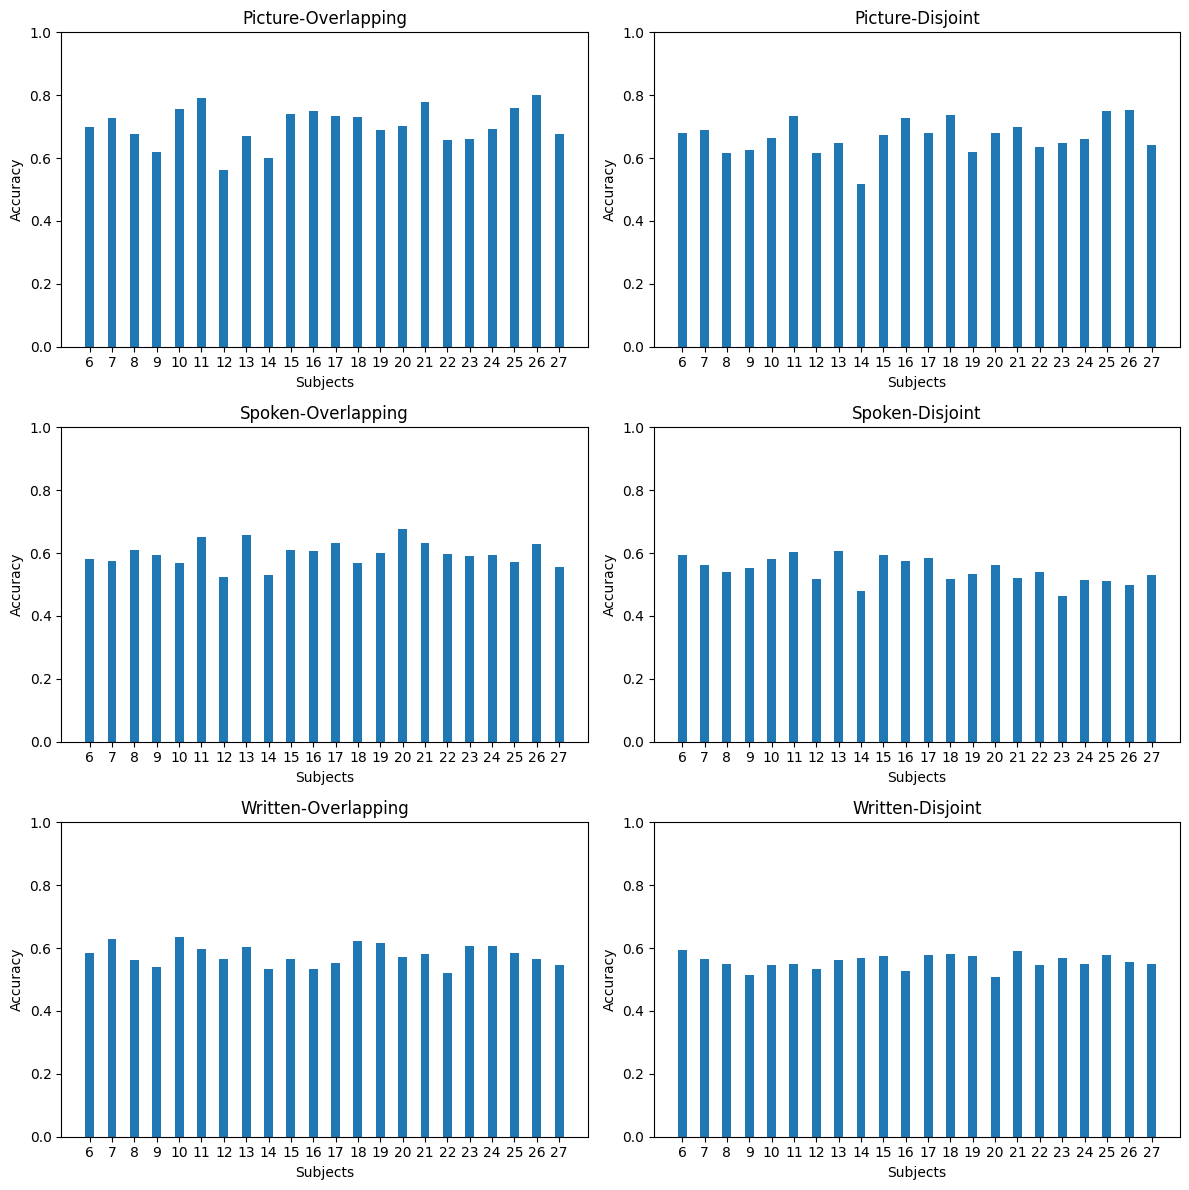

In [4]:


R_accuracy_list = [
R_picture_accuracy_overlapping,
R_picture_accuracy_disjoint,
R_spoken_accuracy_overlapping,
R_spoken_accuracy_disjoint,
R_written_accuracy_overlapping,
R_written_accuracy_disjoint
]

subjects = list(range(6, 28))
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i in range(6):
    axs[i].bar(subjects, R_accuracy_list[i], width=0.4)
    axs[i].set_xlabel('Subjects')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xticks(subjects)
    axs[i].set_ylim(0.0, 1.0)  

axs[0].set_title(f'Picture-Overlapping')
axs[1].set_title(f'Picture-Disjoint')
axs[2].set_title(f'Spoken-Overlapping')
axs[3].set_title(f'Spoken-Disjoint')
axs[4].set_title(f'Written-Overlapping')
axs[5].set_title(f'Written-Disjoint')

plt.tight_layout()
plt.show()


## EEGNet

In [ ]:
def build_eegnet_model(nb_classes, Chans=64, Samples=128, dropoutRate=0.5):
    input_shape = (Chans, Samples, 1)
    model = Sequential()
    model.add(Conv2D(16, (1, 64), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(DepthwiseConv2D((Chans, 1), use_bias=False, depth_multiplier=2, depthwise_constraint=max_norm(1.)))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(AveragePooling2D((1, 4)))
    model.add(Dropout(dropoutRate))
    model.add(SeparableConv2D(16, (1, 16), use_bias=False, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(AveragePooling2D((1, 8)))
    model.add(Dropout(dropoutRate))
    model.add(Flatten(name='flatten'))
    model.add(Dense(nb_classes, name='dense', kernel_constraint=max_norm(0.25)))
    model.add(Activation('softmax', name='softmax'))
    return model


In [ ]:
def EEG_overlapping_cross_validation(X, y, i, modality):
    
    
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    avg_acc = 0
    results=[]
    fold = 1
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = build_eegnet_model(nb_classes=2, Chans=X_train.shape[1], Samples=X_train.shape[2])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        
        model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)
        
        y_pred_probs = model.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)
                
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        avg_acc += accuracy

        print(f"EEGNET Overlapping {modality}")
        print(f"Subject {i}")
        print(f"Fold {fold}")
        print(f"Confusion Matrix (Fold {fold}):\n{cm}")
        print(f"Classification Report (Fold {fold}):\n{classification_report(y_test, y_pred)}")

        fold += 1

    avg_acc /= 4
    results = {
        "subject": i,
        "classifier": 'EEGNET',
        "methodology": "overlapping",
        "modality": modality,
        "accuracy": avg_acc,
        "confusion_matrix": cm.tolist(),
        "classification_report": cr
    }
    
    return results

In [ ]:
def EEG_disjoint_cross_validation(X, y, i, modality):
    avg_acc = 0
    accuracies = []
    results = []

    # KFold cross-validation splits
    kf = KFold(n_splits=4, shuffle=False)
    
    fold = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        

        # Train and evaluate the RandomForestClassifier
        model = build_eegnet_model(nb_classes=2, Chans=X_train.shape[1], Samples=X_train.shape[2])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        
        model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)
        
        y_pred_probs = model.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)
        
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        avg_acc += accuracy
        accuracies.append(accuracy)

        print(f"RF DISJOINT {modality}")
        print(f"Subject {i}")
        print(f"Fold {fold}")
        print(f"Confusion Matrix (Fold {fold}):\n{cm}")
        print(f"Classification Report (Fold {fold}):\n{classification_report(y_test, y_pred)}")

        fold += 1

    avg_acc /= 4
    results = {
        "subject": i,
        "classifier": 'EEGNET',
        "methodology": "disjoint",
        "modality": modality,
        "accuracy": avg_acc,
        "confusion_matrix": cm.tolist(),
        "classification_report": cr
    }
    
    return results

In [ ]:
final=[]
for num in range(3):
    for i in range(6, 28):
        try:
            # Replace with your file path (file path that goes like' /Simanova_Data/reformatted-data/epochs/subj{i:02}.pkl')
            pickle_file_path = f'D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/epochs/subj{i:02}.pkl'
            with open(pickle_file_path, 'rb') as file:
                epochs = pkl.load(file)
            modality=['picture','spoken','written']
            X = epochs[modality[num]].get_data(copy=True)
            reverse_event_id = {v: k for k, v in epochs.event_id.items()}
            y = [reverse_event_id[event] for event in epochs[modality[num]].events[:, 2]]
            X,y=balancing(X,y)
            X=np.array(X)
            y=np.array(y)
            
            y_high_level = np.array([bin_map(label) for label in y])
           
            filtered_indices = y_high_level != None
            X = X[filtered_indices]
            y_high_level = y_high_level[filtered_indices]
            
            label_encoder = LabelEncoder()
            y_binary = label_encoder.fit_transform(y_high_level)

            X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

            sc = StandardScaler()
            X = sc.fit_transform(X.reshape(X.shape[0], -1)).reshape(X.shape[0], X.shape[1], X.shape[2], 1)

            result1 = EEG_overlapping_cross_validation(X, y_binary,i,modality[num])
            final.append(result1)


            #Seperate X and y for disjoint as it is reordered(Sorted)
            X = epochs[modality[num]].get_data(copy=True)
            reverse_event_id = {v: k for k, v in epochs.event_id.items()}
            y = [reverse_event_id[event] for event in epochs[modality[num]].events[:, 2]]
            X,y=balancing(X,y)
            X=np.array(X)
            y=np.array(y)
            X,y=sort_data(X,y)
            X=np.array(X)
            y=np.array(y)

            y_high_level = np.array([bin_map(label) for label in y])
           
            filtered_indices = y_high_level != None
            X = X[filtered_indices]
            y_high_level = y_high_level[filtered_indices]
            
            label_encoder = LabelEncoder()
            y_binary = label_encoder.fit_transform(y_high_level)

            X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

            sc = StandardScaler()
            X = sc.fit_transform(X.reshape(X.shape[0], -1)).reshape(X.shape[0], X.shape[1], X.shape[2], 1)
            
            result2 = EEG_disjoint_cross_validation(X, y_binary,i,modality[num])
            final.append(result2)
            
        except Exception as e:
            print(f"An error occurred for subject {i:02}: {e}")

In [ ]:
final

In [ ]:
# Replace with your file path (file path that goes like' /Simanova_Data/reformatted-data/Results/EEGNET_Equal.pkl')
with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/EEGNET_Equal.pkl', 'wb') as file:
    pkl.dump(final,file)

In [5]:
# Replace with your file path (file path that goes like' /Simanova_Data/reformatted-data/Results/EEGNET_Equal.pkl')
with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/EEGNET_Equal.pkl', 'rb') as file:
    ENresult = pkl.load(file)

In [ ]:
ENresult

In [6]:
len(ENresult)

132

### Visualizing the EEGNET classifier's performance

In [7]:
E_picture_accuracy_overlapping=[]
E_picture_accuracy_disjoint=[]
E_spoken_accuracy_overlapping=[]
E_spoken_accuracy_disjoint=[]
E_written_accuracy_overlapping=[]
E_written_accuracy_disjoint=[]

for i in range (len(ENresult)):
    if ENresult[i]['modality']=="picture" and ENresult[i]['methodology']=='overlapping' :
        E_picture_accuracy_overlapping.append(ENresult[i]['accuracy'])
    if ENresult[i]['modality']=="picture" and ENresult[i]['methodology']=='disjoint' :
        E_picture_accuracy_disjoint.append(ENresult[i]['accuracy'])
    if ENresult[i]['modality']=="spoken" and ENresult[i]['methodology']=='overlapping' :
        E_spoken_accuracy_overlapping.append(ENresult[i]['accuracy'])
    if ENresult[i]['modality']=="spoken" and ENresult[i]['methodology']=='disjoint' :
        E_spoken_accuracy_disjoint.append(ENresult[i]['accuracy'])
    if ENresult[i]['modality']=="written" and ENresult[i]['methodology']=='overlapping' :
        E_written_accuracy_overlapping.append(ENresult[i]['accuracy'])
    if ENresult[i]['modality']=="written" and ENresult[i]['methodology']=='disjoint' :
        E_written_accuracy_disjoint.append(ENresult[i]['accuracy'])
    


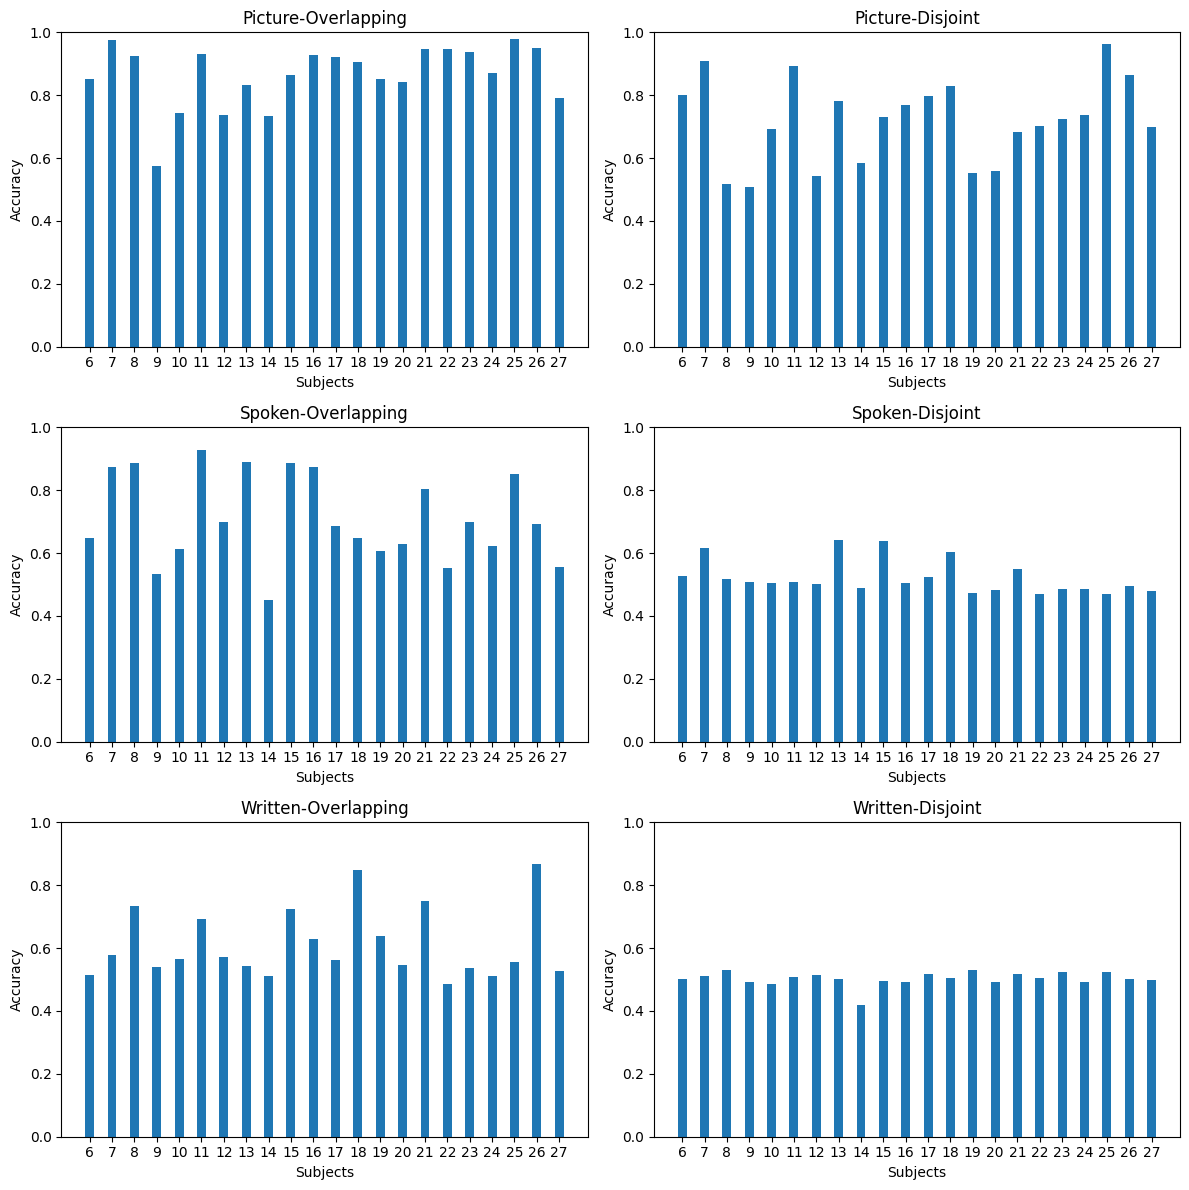

In [8]:

E_accuracy_list = [
E_picture_accuracy_overlapping,
E_picture_accuracy_disjoint,
E_spoken_accuracy_overlapping,
E_spoken_accuracy_disjoint,
E_written_accuracy_overlapping,
E_written_accuracy_disjoint
]

subjects = list(range(6, 28))
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i in range(6):
    axs[i].bar(subjects, E_accuracy_list[i], width=0.4)
    axs[i].set_xlabel('Subjects')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xticks(subjects)
    axs[i].set_ylim(0.0, 1.0) 

axs[0].set_title(f'Picture-Overlapping')
axs[1].set_title(f'Picture-Disjoint')
axs[2].set_title(f'Spoken-Overlapping')
axs[3].set_title(f'Spoken-Disjoint')
axs[4].set_title(f'Written-Overlapping')
axs[5].set_title(f'Written-Disjoint')

plt.tight_layout()
plt.show()


## DeepConvNet

In [ ]:
def build_deepconvnet_model(nb_classes, Chans=64, Samples=128, dropoutRate=0.5):
    input_shape = (Chans, Samples, 1)
    model = Sequential()
    model.add(Conv2D(25, (1, 5), input_shape=input_shape, padding='same'))
    model.add(Conv2D(25, (Chans, 1), padding='valid'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Dropout(dropoutRate))
    
    model.add(Conv2D(50, (1, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Dropout(dropoutRate))
    
    model.add(Conv2D(100, (1, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Dropout(dropoutRate))
    
    model.add(Conv2D(200, (1, 5), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(MaxPooling2D(pool_size=(1, 2)))
    model.add(Dropout(dropoutRate))
    
    model.add(Flatten())
    model.add(Dense(nb_classes, activation='softmax'))
    return model


In [ ]:
def DCN_overlapping_cross_validation(X, y, i, modality):
    
    
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    avg_acc = 0
    results=[]
    fold = 1
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model = build_eegnet_model(nb_classes=2, Chans=X_train.shape[1], Samples=X_train.shape[2])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        
        model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)
        
        y_pred_probs = model.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)
                
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        avg_acc += accuracy

        print(f"EEGNET Overlapping {modality}")
        print(f"Subject {i}")
        print(f"Fold {fold}")
        print(f"Confusion Matrix (Fold {fold}):\n{cm}")
        print(f"Classification Report (Fold {fold}):\n{classification_report(y_test, y_pred)}")

        fold += 1

    avg_acc /= 4
    results = {
        "subject": i,
        "classifier": 'DeepConvNet',
        "methodology": "overlapping",
        "modality": modality,
        "accuracy": avg_acc,
        "confusion_matrix": cm.tolist(),
        "classification_report": cr
    }
    
    return results

In [ ]:

def DCN_disjoint_cross_validation(X, y, i, modality, nb_classes=2, n_splits=4):
    avg_acc = 0
    accuracies = []
    results = []

    # KFold cross-validation splits
    kf = KFold(n_splits=4, shuffle=False)
    
    fold = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train and evaluate the RandomForestClassifier
        model = build_deepconvnet_model(nb_classes=2, Chans=X_train.shape[1], Samples=X_train.shape[2])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        
        model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)
        
        y_pred_probs = model.predict(X_test)
        y_pred = np.argmax(y_pred_probs, axis=1)
        
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        avg_acc += accuracy
        accuracies.append(accuracy)

        print(f"RF DISJOINT {modality}")
        print(f"Subject {i}")
        print(f"Fold {fold}")
        print(f"Confusion Matrix (Fold {fold}):\n{cm}")
        print(f"Classification Report (Fold {fold}):\n{classification_report(y_test, y_pred)}")

        fold += 1

    avg_acc /= len(accuracies)
    results = {
        "subject": i,
        "classifier": 'DeepConvNet',
        "methodology": "disjoint",
        "modality": modality,
        "accuracy": avg_acc,
        "confusion_matrix": cm.tolist(),
        "classification_report": cr
    }
    
    return results

In [ ]:
final=[]
for num in range(3):
    for i in range(6, 28):
        try:
            # Replace with your file path (file path that goes like' /Simanova_Data/reformatted-data/epochs/subj{i:02}.pkl')
            pickle_file_path = f'D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/epochs/subj{i:02}.pkl'
            with open(pickle_file_path, 'rb') as file:
                epochs = pkl.load(file)
            modality=['picture','spoken','written']
            X = epochs[modality[num]].get_data(copy=True)
            reverse_event_id = {v: k for k, v in epochs.event_id.items()}
            y = [reverse_event_id[event] for event in epochs[modality[num]].events[:, 2]]
            X,y=balancing(X,y)
            X=np.array(X)
            y=np.array(y)
            
            
            y_high_level = np.array([bin_map(label) for label in y])
             
            # Filter out None values
            filtered_indices = y_high_level != None
            X = X[filtered_indices]
            y_high_level = y_high_level[filtered_indices]

            # Encoding binary labels to 0 and 1
            label_encoder = LabelEncoder()
            y_binary = label_encoder.fit_transform(y_high_level)

            # Reshaping and Standardizing the data
            X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

            sc = StandardScaler()
            X = sc.fit_transform(X.reshape(X.shape[0], -1)).reshape(X.shape[0], X.shape[1], X.shape[2], 1)

            # Overlapping cross-validation
            result1 = DCN_overlapping_cross_validation(X, y_binary,i,modality[num])
            final.append(result1)

            X = epochs[modality[num]].get_data(copy=True)
            reverse_event_id = {v: k for k, v in epochs.event_id.items()}
            y = [reverse_event_id[event] for event in epochs[modality[num]].events[:, 2]]
            X,y=balancing(X,y)
            X=np.array(X)
            y=np.array(y)
            X,y=sort_data(X,y)
            X=np.array(X)
            y=np.array(y)

            y_high_level = np.array([bin_map(label) for label in y])
             
            # Filter out None values
            filtered_indices = y_high_level != None
            X = X[filtered_indices]
            y_high_level = y_high_level[filtered_indices]

            # Encoding binary labels to 0 and 1
            label_encoder = LabelEncoder()
            y_binary = label_encoder.fit_transform(y_high_level)

            # Reshaping and Standardizing the data
            X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

            sc = StandardScaler()
            X = sc.fit_transform(X.reshape(X.shape[0], -1)).reshape(X.shape[0], X.shape[1], X.shape[2], 1)
            
            result2 = DCN_disjoint_cross_validation(X, y_binary,i,modality[num])
            final.append(result2)
            
        except Exception as e:
            print(f"An error occurred for subject {i:02}: {e}")

In [ ]:
final

In [ ]:
# Replace with your file path (file path that goes like' /Simanova_Data/reformatted-data/Results/DeepConvNet_Equal.pkl')
with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/DeepConvNet_Equal.pkl', 'wb') as file:
    pkl.dump(final,file)

In [9]:
# Replace with your file path (file path that goes like' /Simanova_Data/reformatted-data/Results/DeepConvNet_Equal.pkl')
with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/DeepConvNet_Equal.pkl', 'rb') as file:
    DCNresult = pkl.load(file)

In [10]:
DCNresult

[{'subject': 6,
  'classifier': 'DeepConvNet',
  'methodology': 'overlapping',
  'modality': 'picture',
  'accuracy': 0.8519736842105263,
  'confusion_matrix': [[62, 14], [10, 66]],
  'classification_report': {'0': {'precision': 0.8611111111111112,
    'recall': 0.8157894736842105,
    'f1-score': 0.8378378378378378,
    'support': 76.0},
   '1': {'precision': 0.825,
    'recall': 0.868421052631579,
    'f1-score': 0.8461538461538461,
    'support': 76.0},
   'accuracy': 0.8421052631578947,
   'macro avg': {'precision': 0.8430555555555556,
    'recall': 0.8421052631578947,
    'f1-score': 0.841995841995842,
    'support': 152.0},
   'weighted avg': {'precision': 0.8430555555555556,
    'recall': 0.8421052631578947,
    'f1-score': 0.841995841995842,
    'support': 152.0}}},
 {'subject': 6,
  'classifier': 'DeepConvNet',
  'methodology': 'disjoint',
  'modality': 'picture',
  'accuracy': 0.5476973684210527,
  'confusion_matrix': [[33, 43], [30, 46]],
  'classification_report': {'0': {'p

In [11]:
len(DCNresult)

132

### Visualizing the DeepConvNet classifier's performance

In [12]:
D_picture_accuracy_overlapping=[]
D_picture_accuracy_disjoint=[]
D_spoken_accuracy_overlapping=[]
D_spoken_accuracy_disjoint=[]
D_written_accuracy_overlapping=[]
D_written_accuracy_disjoint=[]

for i in range (len(DCNresult)):
    if DCNresult[i]['modality']=="picture" and DCNresult[i]['methodology']=='overlapping' :
        D_picture_accuracy_overlapping.append(DCNresult[i]['accuracy'])
    if DCNresult[i]['modality']=="picture" and DCNresult[i]['methodology']=='disjoint' :
        D_picture_accuracy_disjoint.append(DCNresult[i]['accuracy'])
    if DCNresult[i]['modality']=="spoken" and DCNresult[i]['methodology']=='overlapping' :
        D_spoken_accuracy_overlapping.append(DCNresult[i]['accuracy'])
    if DCNresult[i]['modality']=="spoken" and DCNresult[i]['methodology']=='disjoint' :
        D_spoken_accuracy_disjoint.append(DCNresult[i]['accuracy'])
    if DCNresult[i]['modality']=="written" and DCNresult[i]['methodology']=='overlapping' :
        D_written_accuracy_overlapping.append(DCNresult[i]['accuracy'])
    if DCNresult[i]['modality']=="written" and DCNresult[i]['methodology']=='disjoint' :
        D_written_accuracy_disjoint.append(DCNresult[i]['accuracy'])

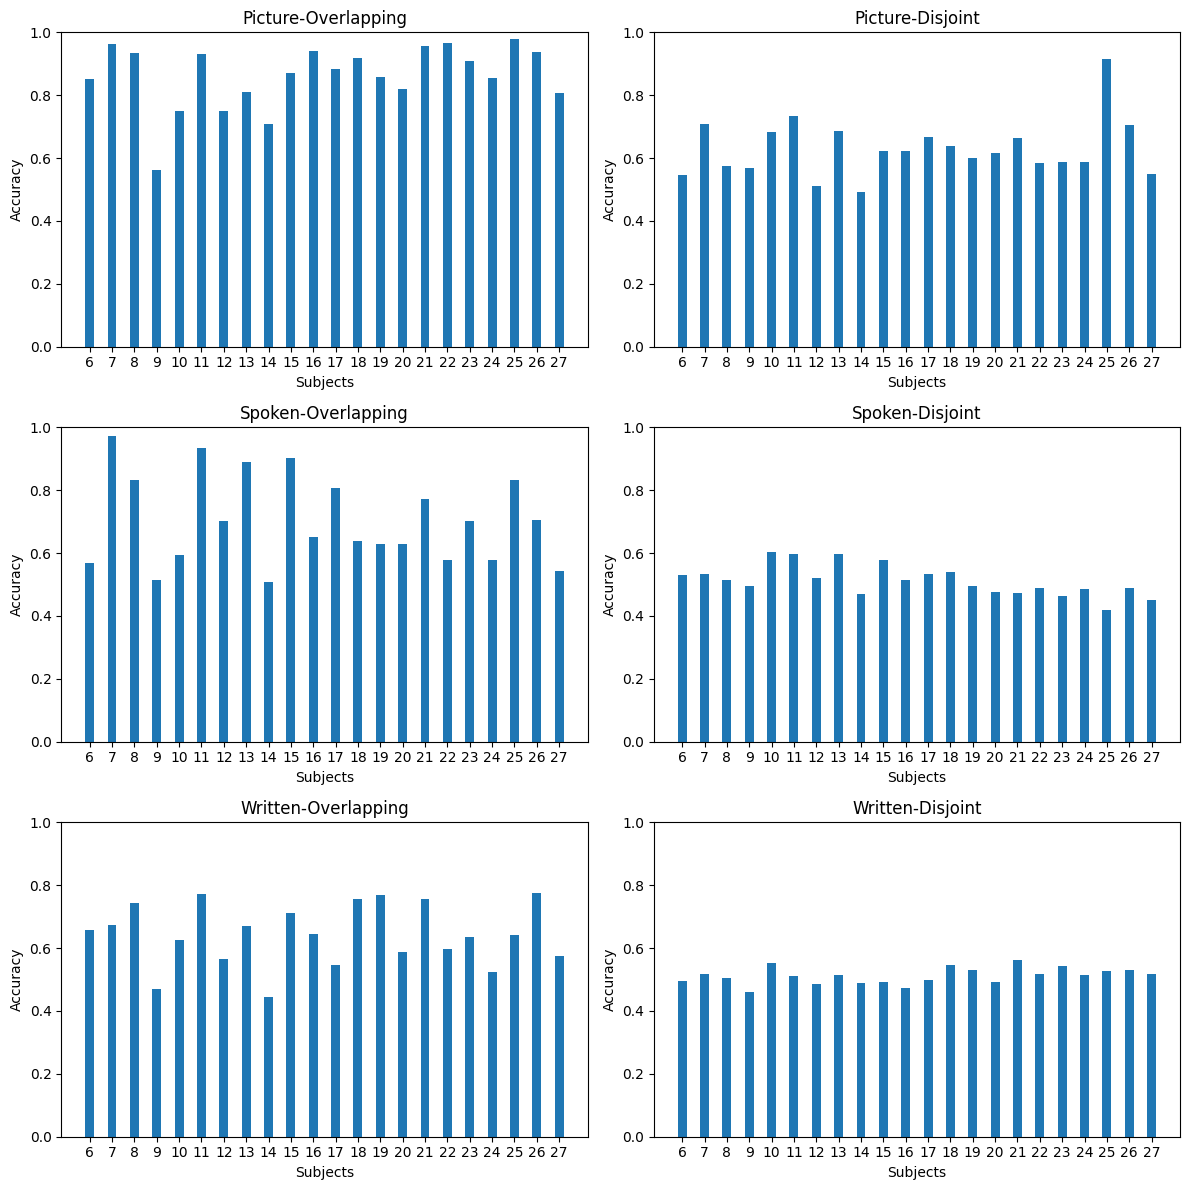

In [13]:
D_accuracy_list = [
D_picture_accuracy_overlapping,
D_picture_accuracy_disjoint,
D_spoken_accuracy_overlapping,
D_spoken_accuracy_disjoint,
D_written_accuracy_overlapping,
D_written_accuracy_disjoint
]

subjects = list(range(6, 28))
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i in range(6):
    axs[i].bar(subjects, D_accuracy_list[i], width=0.4)
    axs[i].set_xlabel('Subjects')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xticks(subjects)
    axs[i].set_ylim(0.0, 1.0)

axs[0].set_title(f'Picture-Overlapping')
axs[1].set_title(f'Picture-Disjoint')
axs[2].set_title(f'Spoken-Overlapping')
axs[3].set_title(f'Spoken-Disjoint')
axs[4].set_title(f'Written-Overlapping')
axs[5].set_title(f'Written-Disjoint')

plt.tight_layout()
plt.show()


## Bayesian Logistic Regression

In [ ]:




def build_bayesian_logistic_regression_model(input_shape):
    inputs = tf.keras.Input(shape=(input_shape,))
    dense = tfp.layers.DenseFlipout(1, activation='sigmoid', kernel_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / X.shape[0])(inputs)
    model = tf.keras.Model(inputs=inputs, outputs=dense)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
    return model


In [ ]:
def Bay_overlapping_cross_validation(X, y, i, modality, nb_classes=2):
   
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    avg_acc = 0
    results=[]
    fold = 1
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        input_shape = X_train.shape[1]
        model = build_bayesian_logistic_regression_model(input_shape)
        model.fit(X_train, y_train, epochs=100, verbose=1)

        y_pred_probs = model.predict(X_test)
        y_pred = (y_pred_probs >= 0.5).astype(int).flatten()
                
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        avg_acc += accuracy

        print(f"Bayesian Overlapping {modality}")
        print(f"Subject {i}")
        print(f"Fold {fold}")
        print(f"Confusion Matrix (Fold {fold}):\n{cm}")
        print(f"Classification Report (Fold {fold}):\n{classification_report(y_test, y_pred)}")

        fold += 1

    avg_acc /= 4
    results = {
        "subject": i,
        "classifier": 'Bayesian',
        "methodology": "overlapping",
        "modality": modality,
        "accuracy": avg_acc,
        "confusion_matrix": cm.tolist(),
        "classification_report": cr
    }
    
    return results

In [ ]:

def Bay_disjoint_cross_validation(X, y, i, modality, nb_classes=2):
    avg_acc = 0
    accuracies = []
    results = []

    # KFold cross-validation splits
    kf = KFold(n_splits=4, shuffle=False)
    
    fold = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Reshaping and Standardizing
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)
       
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        input_shape = X_train.shape[1]

        # Train and evaluate the RandomForestClassifier
        model = build_bayesian_logistic_regression_model(input_shape)
        model.fit(X_train, y_train, epochs=100, verbose=1)

        y_pred_probs = model.predict(X_test)
        y_pred = (y_pred_probs >= 0.5).astype(int).flatten()
        
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        avg_acc += accuracy

        print(f"Bayesian Disjoint {modality}")
        print(f"Subject {i}")
        print(f"Fold {fold}")
        print(f"Confusion Matrix (Fold {fold}):\n{cm}")
        print(f"Classification Report (Fold {fold}):\n{classification_report(y_test, y_pred)}")

        fold += 1

    avg_acc= avg_acc/4
    results= {
        "subject": i,
        "classifier": 'Bayesian',
        "methodology": "disjoint",
        "modality": modality,
        "accuracy": avg_acc,
        "confusion_matrix": cm.tolist(),
        "classification_report": cr
    }
    return results

#### Bayesian Logistic Regression Model did not run in my virtual env, so I ran it in Google Collab The notebook named Simanova_Collab has the same code for you to try it in collab incase this doesn't work on your system. In that case you will have to download the final pickle file and place it in the folder for analysis below.


In [ ]:
# final=[]
# for num in range(3):
#     for i in range(6, 28):
#         try:
#             # Replace with your file path (file path that goes like' /Simanova_Data/reformatted-data/epochs/subj{i:02}.pkl')
#             pickle_file_path = f'D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/epochs/subj{i:02}.pkl'
#             with open(pickle_file_path, 'rb') as file:
#                 epochs = pkl.load(file)
#             modality=['picture','spoken','written']
#             X = epochs[modality[num]].get_data(copy=True)
#             reverse_event_id = {v: k for k, v in epochs.event_id.items()}
#             y = [reverse_event_id[event] for event in epochs[modality[num]].events[:, 2]]
#             X,y=balancing(X,y)
#             X=np.array(X)
#             y=np.array(y)
        
#             # Making Y binary
#             y_high_level = np.array([bin_map(label) for label in y])

#             filtered_indices = y_high_level != None
#             X = X[filtered_indices]
#             y_high_level = y_high_level[filtered_indices]

#             # Encoding binary labels to 0 and 1
#             label_encoder = LabelEncoder()
#             y_binary = label_encoder.fit_transform(y_high_level)

#             # Reshaping and Standardizing the data
#             X = X.reshape(X.shape[0], -1)
#             sc = StandardScaler()
#             X = sc.fit_transform(X)

#             # Overlapping cross-validation
#             result1 = Bay_overlapping_cross_validation(X, y_binary,i,modality[num])
#             final.append(result1)

#             X = epochs[modality[num]].get_data(copy=True)
#             reverse_event_id = {v: k for k, v in epochs.event_id.items()}
#             y = [reverse_event_id[event] for event in epochs[modality[num]].events[:, 2]]
#             X,y=balancing(X,y)
#             X=np.array(X)
#             y=np.array(y)
#             X,y=sort_data(X,y)
#             X=np.array(X)
#             y=np.array(y)
        

#             # Making Y binary
#             y_high_level = np.array([bin_map(label) for label in y])

#             filtered_indices = y_high_level != None
#             X = X[filtered_indices]
#             y_high_level = y_high_level[filtered_indices]

#             # Encoding binary labels to 0 and 1
#             label_encoder = LabelEncoder()
#             y_binary = label_encoder.fit_transform(y_high_level)

#             # Reshaping and Standardizing the data
#             X = X.reshape(X.shape[0], -1)
#             sc = StandardScaler()
#             X = sc.fit_transform(X)

#             result2 = Bay_disjoint_cross_validation(X, y_binary,i,modality[num])
#             final.append(result2)

#         except Exception as e:
#             print(f"An error occurred for subject {i:02}: {e}")

In [ ]:
# with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/BM_Equal.pkl', 'wb') as file:
#     pkl.dump(final,file)

In [14]:
with open('D:/Maynooth Coursework/Final_Project/Simanova_Data/reformatted-data/Results/BM_Equal.pkl', 'rb') as file:
    BMresult = pkl.load(file)

In [ ]:
BMresult

In [15]:
len(BMresult)

132

### Visualizing the Bayesian Logistic Regression classifier's performance

In [16]:
B_picture_accuracy_overlapping=[]
B_picture_accuracy_disjoint=[]
B_spoken_accuracy_overlapping=[]
B_spoken_accuracy_disjoint=[]
B_written_accuracy_overlapping=[]
B_written_accuracy_disjoint=[]

for i in range (len(BMresult)):
    if BMresult[i]['modality']=="picture" and BMresult[i]['methodology']=='overlapping' :
        B_picture_accuracy_overlapping.append(BMresult[i]['accuracy'])
    if BMresult[i]['modality']=="picture" and BMresult[i]['methodology']=='disjoint' :
        B_picture_accuracy_disjoint.append(BMresult[i]['accuracy'])
    if BMresult[i]['modality']=="spoken" and BMresult[i]['methodology']=='overlapping' :
        B_spoken_accuracy_overlapping.append(BMresult[i]['accuracy'])
    if BMresult[i]['modality']=="spoken" and BMresult[i]['methodology']=='disjoint' :
        B_spoken_accuracy_disjoint.append(BMresult[i]['accuracy'])
    if BMresult[i]['modality']=="written" and BMresult[i]['methodology']=='overlapping' :
        B_written_accuracy_overlapping.append(BMresult[i]['accuracy'])
    if BMresult[i]['modality']=="written" and BMresult[i]['methodology']=='disjoint' :
        B_written_accuracy_disjoint.append(BMresult[i]['accuracy'])

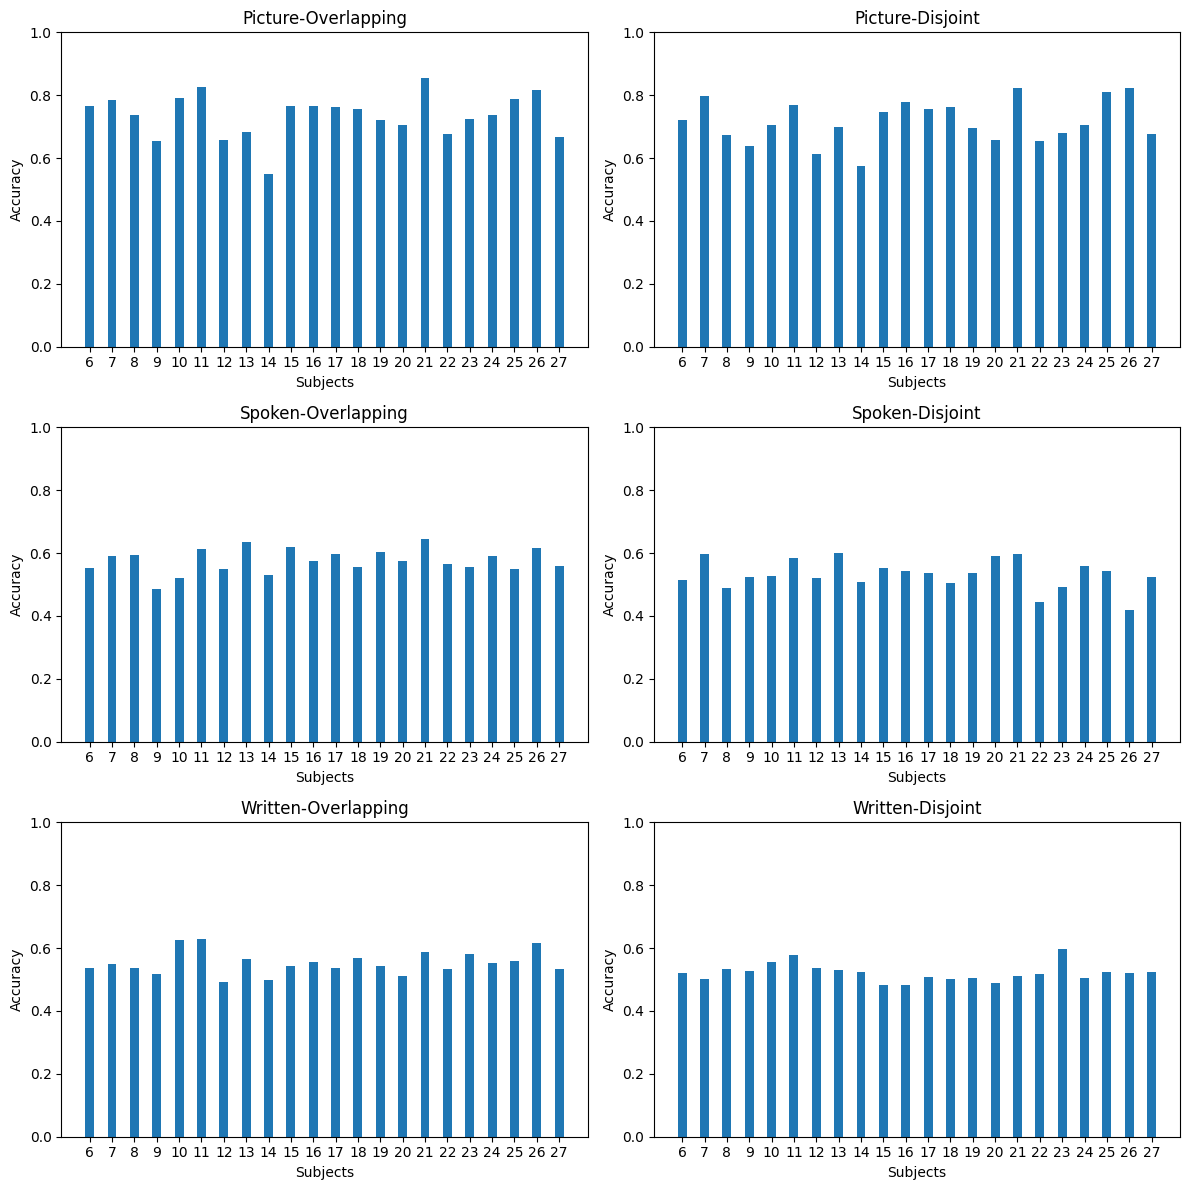

In [17]:
B_accuracy_list = [
B_picture_accuracy_overlapping,
B_picture_accuracy_disjoint,
B_spoken_accuracy_overlapping,
B_spoken_accuracy_disjoint,
B_written_accuracy_overlapping,
B_written_accuracy_disjoint
]

subjects = list(range(6, 28))
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

for i in range(6):
    axs[i].bar(subjects, B_accuracy_list[i], width=0.4)
    axs[i].set_xlabel('Subjects')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xticks(subjects)
    axs[i].set_ylim(0.0, 1.0)

axs[0].set_title(f'Picture-Overlapping')
axs[1].set_title(f'Picture-Disjoint')
axs[2].set_title(f'Spoken-Overlapping')
axs[3].set_title(f'Spoken-Disjoint')
axs[4].set_title(f'Written-Overlapping')
axs[5].set_title(f'Written-Disjoint')

plt.tight_layout()
plt.show()


In [18]:
Result=RFresult+ENresult+DCNresult+BMresult

In [ ]:
Result

In [19]:
len(Result)

528

# Analysis

## Accuracy (for individual subjects)

##### Statistics

In [20]:



accuracy_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'overlapping': None, 'disjoint': None})))


for result in Result:
    classifier = result['classifier']
    subject = result['subject']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[classifier][subject][modality][methodology] = accuracy


accuracy_differences = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'raw_difference': None, 'proportional_difference': None})))

for classifier, subjects in accuracy_data.items():
    for subject, modalities in subjects.items():
        for modality, methods in modalities.items():
            overlapping_acc = methods['overlapping']
            disjoint_acc = methods['disjoint']
            
            if overlapping_acc is not None and disjoint_acc is not None:
                # Calculating Raw and Proportional Accuracy Difference between the methods
                raw_diff = overlapping_acc - disjoint_acc
                prop_diff = raw_diff / disjoint_acc if disjoint_acc != 0 else None
                
                accuracy_differences[classifier][subject][modality] = {
                    'raw_difference': raw_diff,
                    'proportional_difference': prop_diff,
                    'Overlapping_accuracy':overlapping_acc,
                    'Disjoint_accuracy':disjoint_acc
                }

for classifier, subjects in accuracy_differences.items():
    for subject, modalities in subjects.items():
        for modality, diffs in modalities.items():
            raw_diff = diffs['raw_difference']
            prop_diff = diffs['proportional_difference']
            prop_diff_str = f"{prop_diff:.4f}" if prop_diff is not None else "N/A"
            o_acc = diffs['Overlapping_accuracy']
            d_acc = diffs['Disjoint_accuracy']
            
            print(f"Classifier: {classifier}, Subject: {subject}, Modality: {modality}")
            print(f"  Overlapping Accuracy: {o_acc:.4f}  Disjoint Accuracy: {d_acc:.4f}")
            print(f"  Raw Difference: {raw_diff:.4f}")
            print(f"  Proportional Difference: {prop_diff_str}\n")


Classifier: RF, Subject: 6, Modality: picture
  Overlapping Accuracy: 0.6974  Disjoint Accuracy: 0.6809
  Raw Difference: 0.0164
  Proportional Difference: 0.0242

Classifier: RF, Subject: 6, Modality: spoken
  Overlapping Accuracy: 0.5800  Disjoint Accuracy: 0.5933
  Raw Difference: -0.0133
  Proportional Difference: -0.0225

Classifier: RF, Subject: 6, Modality: written
  Overlapping Accuracy: 0.5833  Disjoint Accuracy: 0.5933
  Raw Difference: -0.0100
  Proportional Difference: -0.0169

Classifier: RF, Subject: 7, Modality: picture
  Overlapping Accuracy: 0.7273  Disjoint Accuracy: 0.6883
  Raw Difference: 0.0390
  Proportional Difference: 0.0566

Classifier: RF, Subject: 7, Modality: spoken
  Overlapping Accuracy: 0.5743  Disjoint Accuracy: 0.5608
  Raw Difference: 0.0135
  Proportional Difference: 0.0241

Classifier: RF, Subject: 7, Modality: written
  Overlapping Accuracy: 0.6301  Disjoint Accuracy: 0.5659
  Raw Difference: 0.0642
  Proportional Difference: 0.1134

Classifier: RF

##### Graphical

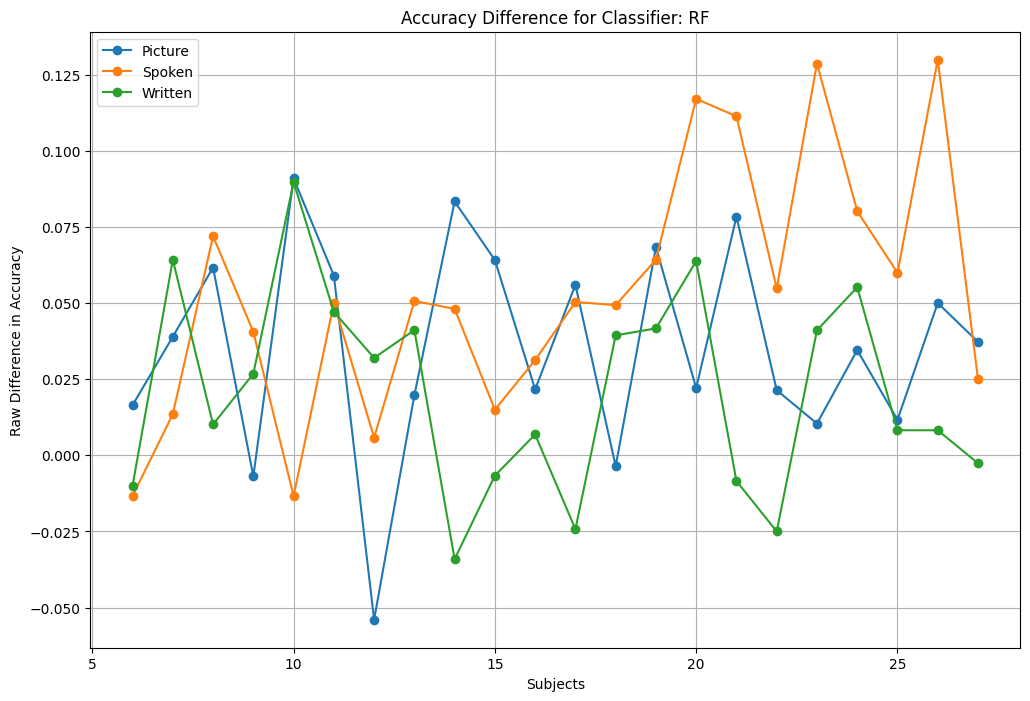

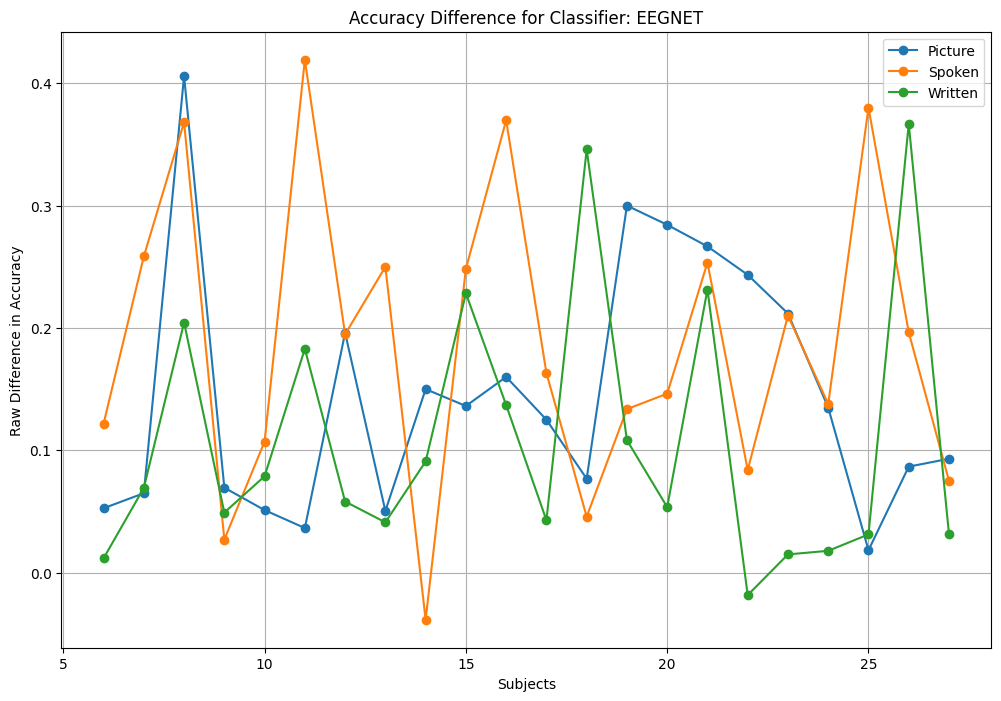

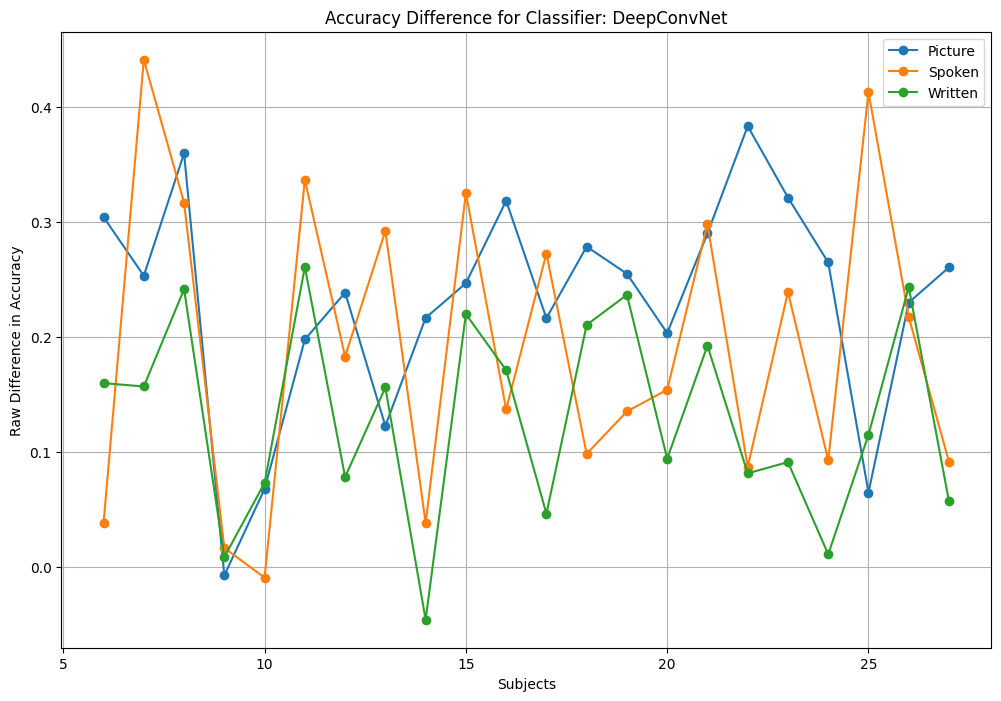

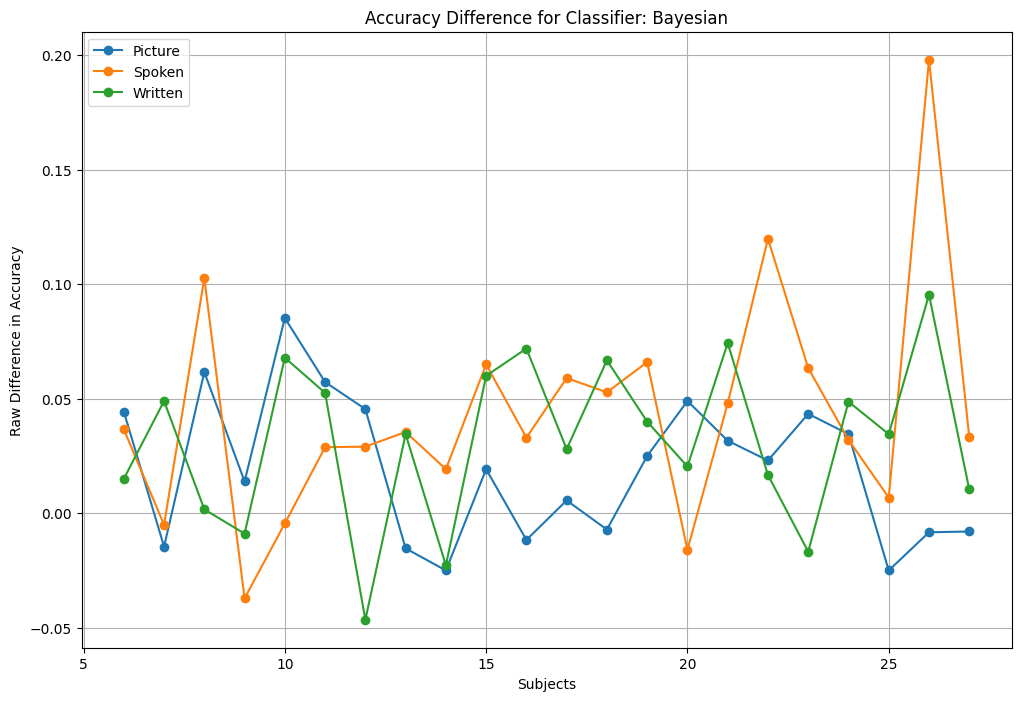

In [21]:

accuracy_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'overlapping': None, 'disjoint': None})))


for result in Result:
    classifier = result['classifier']
    subject = result['subject']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[classifier][subject][modality][methodology] = accuracy


accuracy_differences = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'raw_difference': None, 'proportional_difference': None})))

for classifier, subjects in accuracy_data.items():
    for subject, modalities in subjects.items():
        for modality, methods in modalities.items():
            overlapping_acc = methods['overlapping']
            disjoint_acc = methods['disjoint']
            
            if overlapping_acc is not None and disjoint_acc is not None:
                raw_diff = overlapping_acc - disjoint_acc
                prop_diff = raw_diff / disjoint_acc if disjoint_acc != 0 else None
                
                accuracy_differences[classifier][subject][modality] = {
                    'raw_difference': raw_diff,
                    'proportional_difference': prop_diff
                }

for classifier, subjects in accuracy_differences.items():
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for modality in ['picture', 'spoken', 'written']:
        subjects_list = []
        raw_diffs = []
        
        for subject, modalities in subjects.items():
            if modality in modalities:
                subjects_list.append(subject)
                raw_diffs.append(modalities[modality]['raw_difference'])
        
        if raw_diffs:
            ax.plot(subjects_list, raw_diffs, marker='o', label=modality.capitalize())
    
    ax.set_xlabel('Subjects')
    ax.set_ylabel('Raw Difference in Accuracy')
    ax.set_title(f'Accuracy Difference for Classifier: {classifier}')
    ax.legend()
    plt.grid(True)
    plt.show()


## Average accuracy increase between methodology for each classifier and modalities

##### Detailed

In [22]:


accuracy_data = defaultdict(lambda: {'overlapping': [], 'disjoint': []})

for result in Result:
    classifier = result['classifier']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[(classifier, modality)][methodology].append(accuracy)

accuracy_differences = {}

# Calculating differences only if both methodologies have data
for key, methods in accuracy_data.items():
    classifier, modality = key
    
    overlapping_accuracies = methods['overlapping']
    disjoint_accuracies = methods['disjoint']
    
    # Checking for pairs of accuracies
    if not overlapping_accuracies or not disjoint_accuracies:
        print(f"Warning: Missing accuracies for {classifier} - {modality}")
        continue
    
    # Average accuracies
    avg_overlapping = sum(overlapping_accuracies) / len(overlapping_accuracies)
    avg_disjoint = sum(disjoint_accuracies) / len(disjoint_accuracies)
    
    raw_diff = avg_overlapping - avg_disjoint
    prop_diff = raw_diff / avg_disjoint if avg_disjoint != 0 else None


    accuracy_differences[(classifier, modality)] = {
        'raw_difference': raw_diff,
        'proportional_difference': prop_diff,
        'Overlapping_accuracy':avg_overlapping,
        'Disjoint_accuracy':avg_disjoint
    }


for key, diffs in accuracy_differences.items():
    classifier, modality = key
    raw_diff = diffs['raw_difference']
    prop_diff = diffs['proportional_difference']
    prop_diff_str = f"{prop_diff:.4f}" if prop_diff is not None else "N/A"
    o_acc = diffs['Overlapping_accuracy']
    d_acc = diffs['Disjoint_accuracy']
    
    print(f"Classifier: {classifier}, Modality: {modality}")
    print(f"  Overlapping Accuracy: {o_acc:.4f}  Disjoint Accuracy: {d_acc:.4f}")
    print(f"  Raw Difference: {raw_diff:.4f}")
    print(f"  Proportional Difference: {prop_diff_str}\n")


Classifier: RF, Modality: picture
  Overlapping Accuracy: 0.7034  Disjoint Accuracy: 0.6678
  Raw Difference: 0.0355
  Proportional Difference: 0.0532

Classifier: RF, Modality: spoken
  Overlapping Accuracy: 0.5978  Disjoint Accuracy: 0.5446
  Raw Difference: 0.0532
  Proportional Difference: 0.0977

Classifier: RF, Modality: written
  Overlapping Accuracy: 0.5784  Disjoint Accuracy: 0.5573
  Raw Difference: 0.0211
  Proportional Difference: 0.0379

Classifier: EEGNET, Modality: picture
  Overlapping Accuracy: 0.8658  Disjoint Accuracy: 0.7197
  Raw Difference: 0.1461
  Proportional Difference: 0.2030

Classifier: EEGNET, Modality: spoken
  Overlapping Accuracy: 0.7102  Disjoint Accuracy: 0.5215
  Raw Difference: 0.1887
  Proportional Difference: 0.3619

Classifier: EEGNET, Modality: written
  Overlapping Accuracy: 0.6108  Disjoint Accuracy: 0.5028
  Raw Difference: 0.1081
  Proportional Difference: 0.2149

Classifier: DeepConvNet, Modality: picture
  Overlapping Accuracy: 0.8618  Dis

##### Summarized

In [23]:


accuracy_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'overlapping': None, 'disjoint': None})))


for result in Result:
    classifier = result['classifier']
    subject = result['subject']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[classifier][subject][modality][methodology] = accuracy

#Differences
accuracy_differences = defaultdict(lambda: defaultdict(list))

for classifier, subjects in accuracy_data.items():
    for subject, modalities in subjects.items():
        for modality, methods in modalities.items():
            overlapping_acc = methods['overlapping']
            disjoint_acc = methods['disjoint']
            
            if overlapping_acc is not None and disjoint_acc is not None:
                raw_diff = overlapping_acc - disjoint_acc
                accuracy_differences[classifier][modality].append(raw_diff)

average_accuracy_increase = defaultdict(lambda: defaultdict(float))

for classifier, modalities in accuracy_differences.items():
    for modality, differences in modalities.items():
        if differences:
            average_accuracy_increase[classifier][modality] = sum(differences) / len(differences)


for classifier, modalities in average_accuracy_increase.items():
    print(f"Classifier: {classifier}")
    for modality, avg_increase in modalities.items():
        print(f"  Modality: {modality}, Average Accuracy Increase: {avg_increase:.4f}")



Classifier: RF
  Modality: picture, Average Accuracy Increase: 0.0355
  Modality: spoken, Average Accuracy Increase: 0.0532
  Modality: written, Average Accuracy Increase: 0.0211
Classifier: EEGNET
  Modality: picture, Average Accuracy Increase: 0.1461
  Modality: spoken, Average Accuracy Increase: 0.1887
  Modality: written, Average Accuracy Increase: 0.1081
Classifier: DeepConvNet
  Modality: picture, Average Accuracy Increase: 0.2313
  Modality: spoken, Average Accuracy Increase: 0.1917
  Modality: written, Average Accuracy Increase: 0.1302
Classifier: Bayesian
  Modality: picture, Average Accuracy Increase: 0.0193
  Modality: spoken, Average Accuracy Increase: 0.0439
  Modality: written, Average Accuracy Increase: 0.0315


## Boxplot of Difference in Accuracy

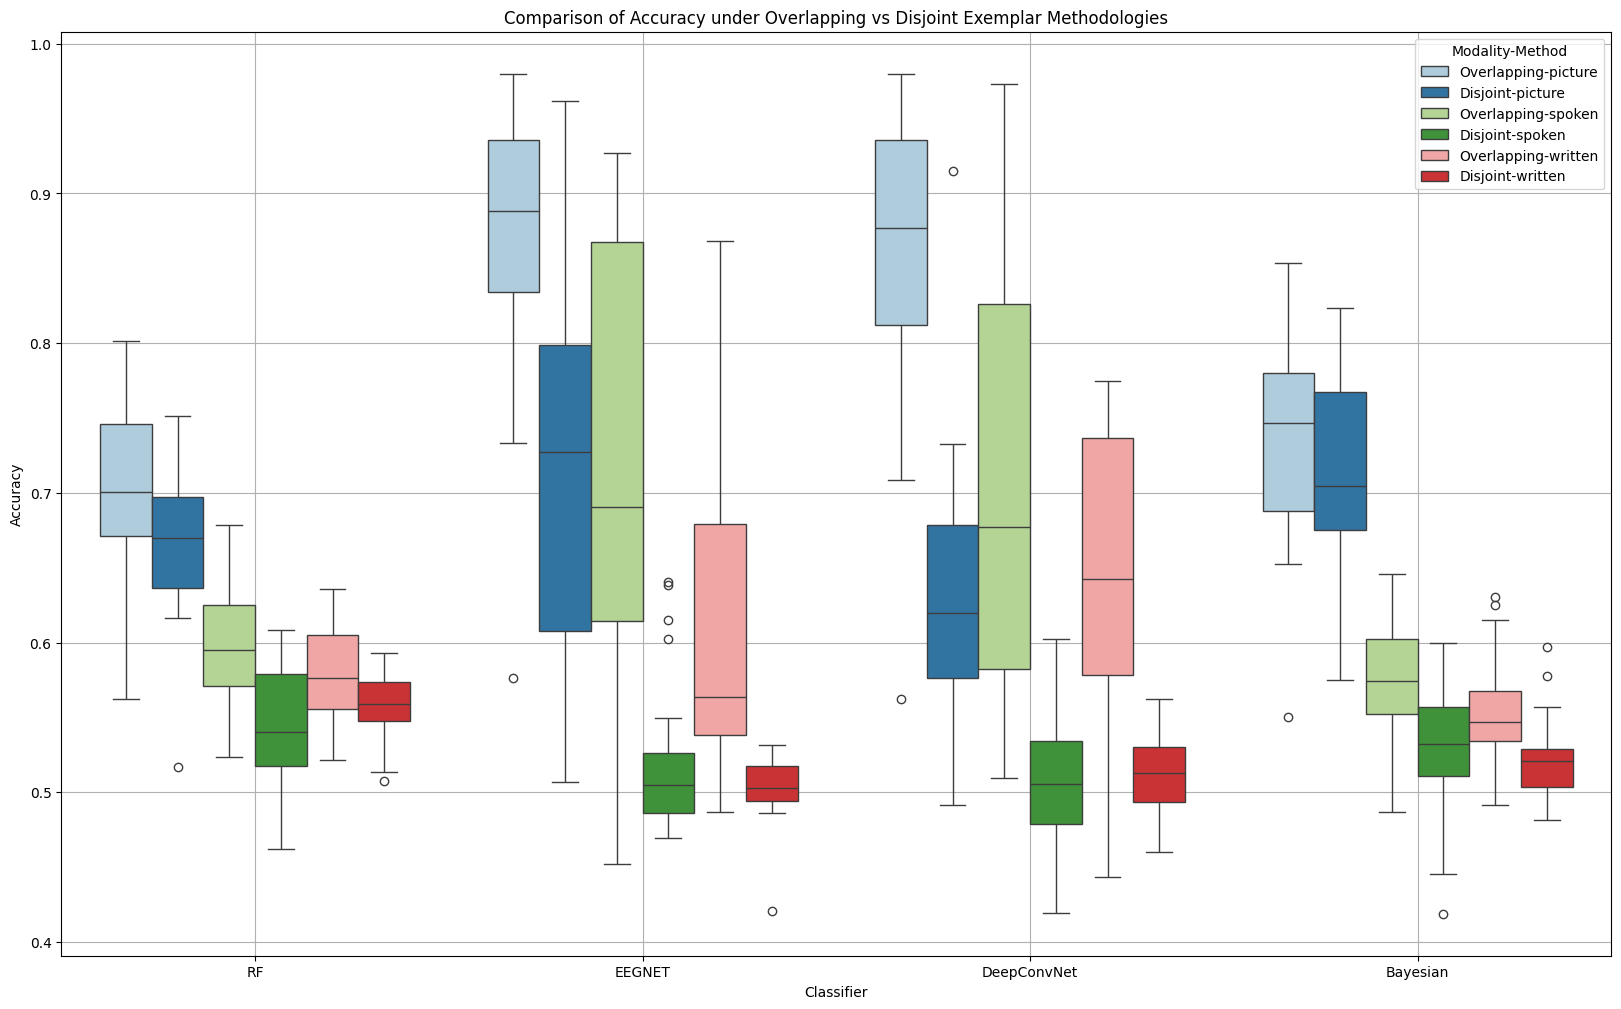

In [24]:
accuracy_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'overlapping': None, 'disjoint': None})))

# Populate the dictionary
for result in Result:
    classifier = result['classifier']
    subject = result['subject']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[classifier][subject][modality][methodology] = accuracy

# Flatten the dictionary into a list of dictionaries for DataFrame creation
data_list = []
for classifier, subjects in accuracy_data.items():
    for subject, modalities in subjects.items():
        for modality, methodologies in modalities.items():
            for methodology, accuracy in methodologies.items():
                if accuracy is not None:
                    data_list.append({
                        'Classifier': classifier,
                        'Subject': subject,
                        'Modality': modality,
                        'Type': methodology.capitalize(),
                        'Accuracy': accuracy
                    })



df = pd.DataFrame(data_list)

# Melt the DataFrame to create a 'combined' column for better separation
df['Combined'] = df['Type'] + '-' + df['Modality']
plt.figure(figsize=(20, 12))

# BOXplots
sns.boxplot(x='Classifier', y='Accuracy', hue='Combined', data=df, palette='Paired')

plt.title('Comparison of Accuracy under Overlapping vs Disjoint Exemplar Methodologies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', title='Modality-Method')
plt.grid(True)
plt.show()

# Statistical Tests

### T-test with Bonferroni correction method
It is a conservative correction method

In [25]:


data_list = []
for result in Result:
    data_list.append({
        'Subject': result['subject'],
        'Classifier': result['classifier'],
        'Modality': result['modality'],
        'Methodology': result['methodology'],
        'Accuracy': result['accuracy']
    })

df = pd.DataFrame(data_list)

# Paired t-tests
results = []
for classifier in df['Classifier'].unique():
    for modality in df['Modality'].unique():
        subset = df[(df['Classifier'] == classifier) & (df['Modality'] == modality)]
        if not subset.empty:
            overlapping_acc = subset[subset['Methodology'] == 'overlapping']['Accuracy']
            disjoint_acc = subset[subset['Methodology'] == 'disjoint']['Accuracy']
            
            if len(overlapping_acc) == len(disjoint_acc):
                t_stat, p_value = ttest_rel(overlapping_acc, disjoint_acc)
                results.append({
                    'Classifier': classifier,
                    'Modality': modality,
                    # 'Difference in Accuracy': raw_diff,
                    't-statistic': t_stat,
                    'p-value': p_value
                })

# Create results DataFrame
results_df = pd.DataFrame(results)

# Interpret results
alpha = 0.05/(4*3)
results_df['Significant'] = results_df['p-value'] < alpha

# Display results
print(results_df)

     Classifier Modality  t-statistic       p-value  Significant
0            RF  picture     4.858222  8.382754e-05         True
1            RF   spoken     6.035737  5.451467e-06         True
2            RF  written     2.992204  6.944417e-03        False
3        EEGNET  picture     6.682687  1.296035e-06         True
4        EEGNET   spoken     7.250522  3.839882e-07         True
5        EEGNET  written     4.711175  1.188634e-04         True
6   DeepConvNet  picture    11.267003  2.307111e-10         True
7   DeepConvNet   spoken     6.857282  8.875840e-07         True
8   DeepConvNet  written     7.010041  6.394263e-07         True
9      Bayesian  picture     2.898831  8.587420e-03        False
10     Bayesian   spoken     4.124042  4.830033e-04         True
11     Bayesian  written     4.117912  4.901358e-04         True


### T-test with Holm-Bonferroni correction method

In [28]:

data_list = []
for result in Result:
    data_list.append({
        'Subject': result['subject'],
        'Classifier': result['classifier'],
        'Modality': result['modality'],
        'Methodology': result['methodology'],
        'Accuracy': result['accuracy']
    })

df = pd.DataFrame(data_list)

# Paired t-tests
results = []
for classifier in df['Classifier'].unique():
    for modality in df['Modality'].unique():
        subset = df[(df['Classifier'] == classifier) & (df['Modality'] == modality)]
        if not subset.empty:
            overlapping_acc = subset[subset['Methodology'] == 'overlapping']['Accuracy']
            disjoint_acc = subset[subset['Methodology'] == 'disjoint']['Accuracy']
            
            if len(overlapping_acc) == len(disjoint_acc):
                t_stat, p_value = ttest_rel(overlapping_acc, disjoint_acc)
                results.append({
                    'Classifier': classifier,
                    'Modality': modality,
                    't-statistic': t_stat,
                    'p-value': p_value
                })


results_df = pd.DataFrame(results)

# Holm-Bonferroni correction
m = len(results_df)
print(m)
sorted_p_values = results_df['p-value'].sort_values().values
adjusted_p_values = []

for i, p_value in enumerate(sorted_p_values):
    adjusted_p_value = p_value * (m - i+1)
    adjusted_p_value = min(adjusted_p_value, 1.0)
    adjusted_p_values.append(adjusted_p_value)

results_df['adjusted_p-value'] = adjusted_p_values

# Interpret results
results_df['Significant'] = results_df['adjusted_p-value'] < 0.05

# Display results
print(results_df)


12
     Classifier Modality  t-statistic       p-value  adjusted_p-value  \
0            RF  picture     4.858222  8.382754e-05      2.999245e-09   
1            RF   spoken     6.035737  5.451467e-06      4.607858e-06   
2            RF  written     2.992204  6.944417e-03      7.033689e-06   
3        EEGNET  picture     6.682687  1.296035e-06      8.875840e-06   
4        EEGNET   spoken     7.250522  3.839882e-07      1.166431e-05   
5        EEGNET  written     4.711175  1.188634e-04      4.361173e-05   
6   DeepConvNet  picture    11.267003  2.307111e-10      5.867928e-04   
7   DeepConvNet   spoken     6.857282  8.875840e-07      7.131801e-04   
8   DeepConvNet  written     7.010041  6.394263e-07      2.415016e-03   
9      Bayesian  picture     2.898831  8.587420e-03      1.960543e-03   
10     Bayesian   spoken     4.124042  4.830033e-04      2.083325e-02   
11     Bayesian  written     4.117912  4.901358e-04      1.717484e-02   

    Significant  
0          True  
1          

### Determining impact of Leakage on accuracies of different modalities
Fitting a Mixed Linear Regression model to coin a relationship between Accuracy with leakage (Overlapping) and without leakage (Disjoint) under multiple modalities.

In [27]:
accuracy_data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'overlapping': None, 'disjoint': None})))
accuracy_differences = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: {'raw_difference': None, 'proportional_difference': None})))

# Populate accuracy_data
for result in Result:
    classifier = result['classifier']
    subject = result['subject']
    modality = result['modality']
    methodology = result['methodology']
    accuracy = result['accuracy']
    
    accuracy_data[classifier][subject][modality][methodology] = accuracy

# Calculate differences and populate accuracy_differences
for classifier, subjects in accuracy_data.items():
    for subject, modalities in subjects.items():
        for modality, methods in modalities.items():
            overlapping_acc = (methods['overlapping']-0.5)*100
            disjoint_acc = (methods['disjoint']-0.5)*100
            
            if overlapping_acc is not None and disjoint_acc is not None:
                raw_diff = overlapping_acc - disjoint_acc
                prop_diff = raw_diff / disjoint_acc if disjoint_acc != 0 else None
                
                accuracy_differences[classifier][subject][modality] = {
                    'overlapping_accuracy': overlapping_acc,
                    'disjoint_accuracy': disjoint_acc
                }

# Convert accuracy_differences to a DataFrame for modeling
data_for_model = []

for classifier, subjects in accuracy_differences.items():
    for subject, modalities in subjects.items():
        for modality, metrics in modalities.items():
            data_for_model.append({
                'classifier': classifier,
                'subject': subject,
                'modality': modality,
                'overlapping_accuracy': metrics['overlapping_accuracy'],
                'disjoint_accuracy': metrics['disjoint_accuracy']
            })

df_model = pd.DataFrame(data_for_model)

# Add modality-specific overlapping accuracies
df_model['overlapping_accuracy_spoken'] = df_model.apply(
    lambda row: row['overlapping_accuracy'] if row['modality'] == 'spoken' else 0, axis=1
)
df_model['overlapping_accuracy_written'] = df_model.apply(
    lambda row: row['overlapping_accuracy'] if row['modality'] == 'written' else 0, axis=1
)


model_formula = 'disjoint_accuracy ~ 0+overlapping_accuracy + overlapping_accuracy_spoken + overlapping_accuracy_written'


md = mixedlm(model_formula, df_model, groups=df_model['classifier'], re_formula="~1")
mdf = md.fit()


print(mdf.summary())

                 Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    disjoint_accuracy
No. Observations:    264        Method:                REML             
No. Groups:          4          Scale:                 29.2014          
Min. group size:     66         Log-Likelihood:        -832.2744        
Max. group size:     66         Converged:             Yes              
Mean group size:     66.0                                               
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
overlapping_accuracy          0.611    0.027  22.887 0.000  0.559  0.664
overlapping_accuracy_spoken  -0.420    0.037 -11.419 0.000 -0.492 -0.348
overlapping_accuracy_written -0.403    0.053  -7.641 0.000 -0.507 -0.300
Group Var                    11.600    1.597                         